In [14]:
!wget https://pixabay.com/get/g5068980ff87b205b9e1be6232f5acb9ff14cc689ed1f06d61e940355eeb1bfd677d9f9b478499a24c48b383224cd5595_640.jpg -O moai.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Moai_Rano_raraku.jpg/450px-Moai_Rano_raraku.jpg

--2023-08-31 19:51:56--  https://pixabay.com/get/g5068980ff87b205b9e1be6232f5acb9ff14cc689ed1f06d61e940355eeb1bfd677d9f9b478499a24c48b383224cd5595_640.jpg
Resolving pixabay.com (pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to pixabay.com (pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2023-08-31 19:51:57 ERROR 400: Bad Request.

--2023-08-31 19:51:57--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Moai_Rano_raraku.jpg/450px-Moai_Rano_raraku.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92613 (90K) [image/jpeg]
Saving to: ‘450px-Moai_Rano_raraku.jpg.1’

450px-Moai_Rano_rar 100%[===================>]  90.44K  --.-KB/s    in 0.05s   

2023-08-31 19:51:57 (1.62 MB/s) - ‘450px-Moai_Rano_

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [16]:
#Funcion que calcula la convolucion de una imagen con un filtro
def convolution(image, kernel):
    #Zero padding
    shift_row = kernel.shape[0]//2
    shift_col = kernel.shape[1]//2

    new_image = np.zeros((image.shape[0] + 2*shift_row, image.shape[1] + 2*shift_col),
                         np.float32)
    new_image[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col] = image

    #Imagen resultante
    new_image2 = np.zeros((new_image.shape[0], new_image.shape[1]), np.float32)

    #Perform filtering
    for i in range(shift_row, image.shape[0]+shift_row):
        for j in range(shift_col, image.shape[1]+shift_col):
            aux = new_image[i-shift_row:i+shift_row+1, j-shift_col:j+shift_col+1]
            new_image2[i,j] = np.sum(aux*kernel)

    return new_image2[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

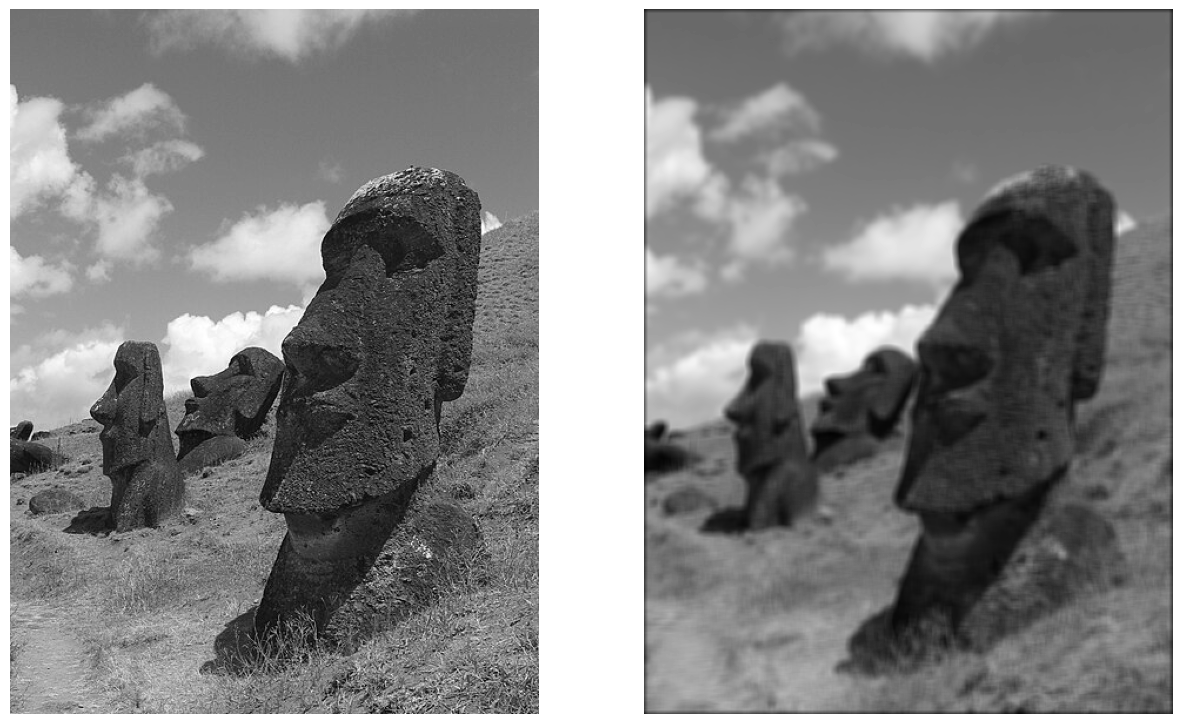

In [17]:
im = cv2.imread('450px-Moai_Rano_raraku.jpg', 0)
sizeKernel = 7
kernel = (1/(sizeKernel**2))*np.ones((sizeKernel,sizeKernel))

im2 = convolution(im, kernel)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(im, cmap='gray'), plt.axis(False)
plt.subplot(1,2,2), plt.imshow(im2, cmap='gray'), plt.axis(False)
plt.show()

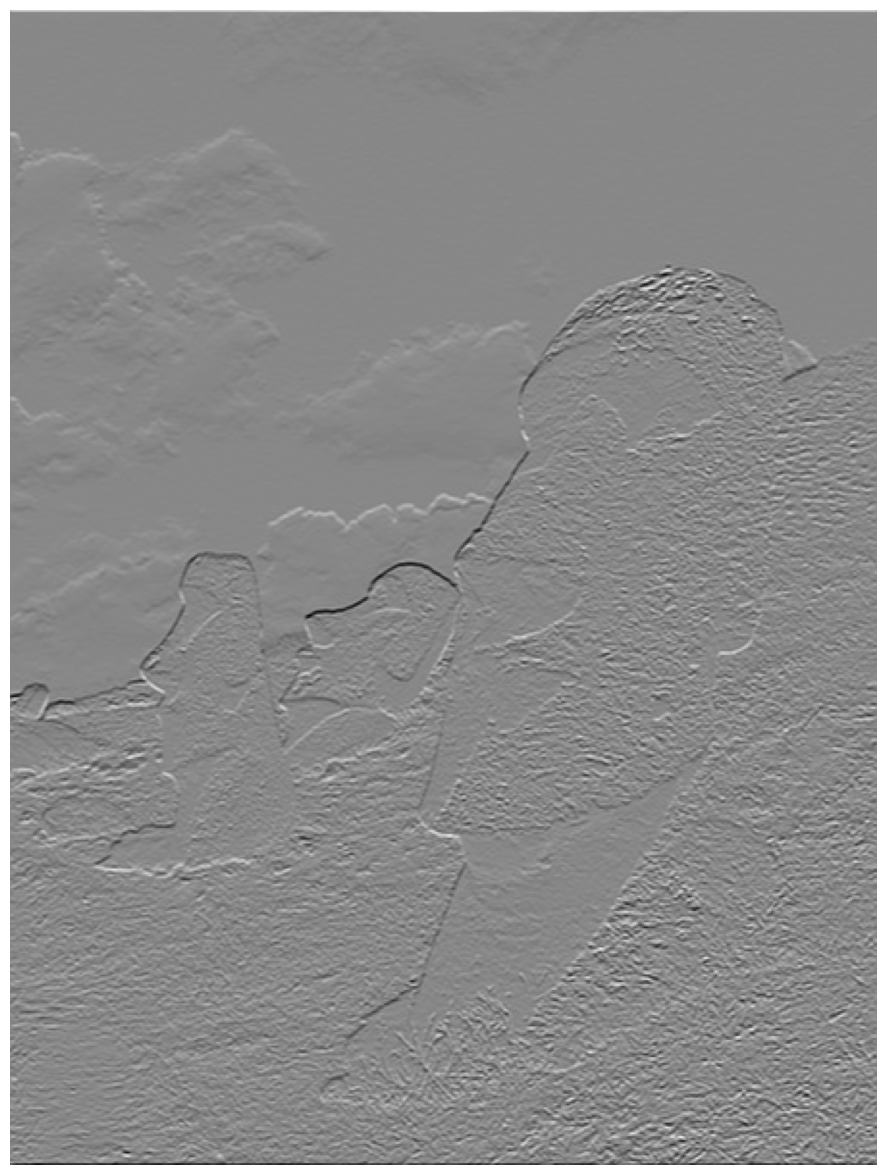

In [19]:
im = cv2.imread('450px-Moai_Rano_raraku.jpg', 0)
kernel = np.array([[-1, -2, -1],[0,0,0],[1, 2, 1]], int)

im2 = convolution(im, kernel)

plt.figure(figsize=(15,15))
plt.imshow(im2, cmap='gray'), plt.axis(False)
plt.show()



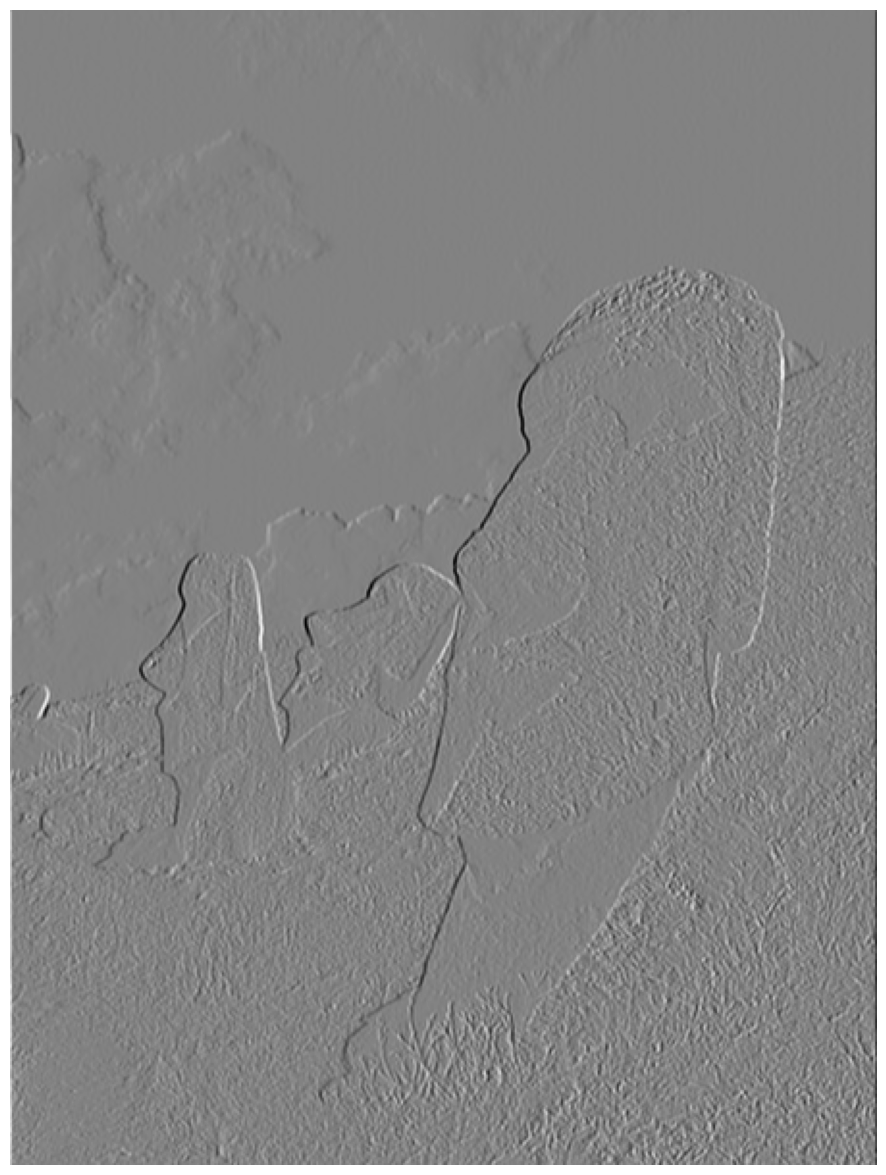

In [20]:
im = cv2.imread('450px-Moai_Rano_raraku.jpg', 0)
kernel = np.array([[-1, 0, 1],[-2,0,2],[-1, 0, 1]], int)

im2 = convolution(im, kernel)

plt.figure(figsize=(15,15))
plt.imshow(im2, cmap='gray'), plt.axis(False)
plt.show()
